In [1]:
%matplotlib inline
import pylab as plt
plt.style.use('fivethirtyeight')

import pandas as pd

# Reading the dataset

In [2]:
path = '../data/l5/201801-citibike-tripdata.csv.zip'
df = pd.read_csv(path)

In [3]:
df.shape  # 15 колонок, ~719 тысяч поездок

(718994, 15)

In [4]:
df.head(3)
# or df.tail(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1


# Распределение

In [5]:
import scipy
import numpy as np
from scipy import stats

In [26]:
df['tripduration'] /= 60

In [27]:
max_cutoff = 35 # 35 min

In [28]:
Y = df.loc[df.tripduration < max_cutoff, 'tripduration']

In [29]:
def plot_pdf(dist, y, size, name, ax=None):
    x = scipy.arange(size)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    
    if ax is None:
        fig, ax = plt.subplots()
        
    ax.plot(pdf_fitted, label=name, alpha=1, linewidth=2)

In [30]:
distributions = {
    'beta': stats.beta,
    'rayleigh': stats.rayleigh,
    'lognorm': stats.lognorm,
}

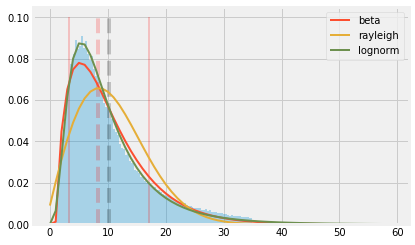

In [31]:
STD = Y.std()

ax = Y.hist(bins=100, density=1, alpha=.3)
ax.vlines(Y.mean(), 0, .1, linestyles='--', color='black', alpha=.2)
ax.vlines(Y.median(), 0,.1, linestyles='--', color='red', alpha=.2)
ax.vlines([Y.mean() + STD, Y.mean() - STD], 0, .1,  color='red', alpha=.2, linewidth=2)

for name, distr in distributions.items():
    plot_pdf(distr, Y, 60, name, ax)
    
plt.legend()

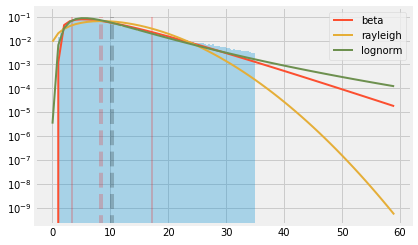

In [32]:
STD = Y.std()

ax = Y.hist(bins=100, density=1, alpha=.3)
ax.set_yscale('log')
ax.vlines(Y.mean(), 0, .1, linestyles='--', color='black', alpha=.2)
ax.vlines(Y.median(), 0,.1, linestyles='--', color='red', alpha=.2)
ax.vlines([Y.mean() + STD, Y.mean() - STD], 0, .1,  color='red', alpha=.2, linewidth=2)

for name, distr in distributions.items():
    plot_pdf(distr, Y, 60, name, ax)
    
plt.legend()

# Оценка Вероятности

In [33]:
param = stats.lognorm.fit(Y)
x = scipy.arange(60)

cdf_fitted = stats.lognorm.cdf(x, *param[:-2], loc=param[-2], scale=param[-1])

шанс что путеществие будет больше чем 9 минут -- почти 50%, что (почти) бьется с медианой.

In [34]:
f'{cdf_fitted[9]:.2%}' 

'54.47%'

шанс что путеществие будет больше чем 20 минут ~ 10%

In [47]:
f'{pdf_fitted[20:].sum():.2%}'  

'9.85%'

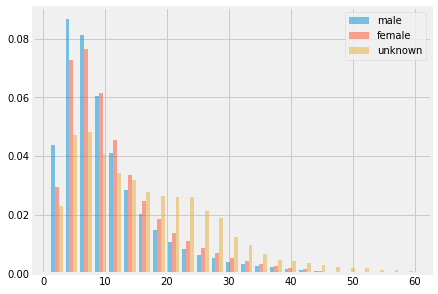

In [60]:
tmask = df.tripduration < 60
fm_mask = df.gender == 2
m_mask = df.gender == 1
u_mask = df.gender == 0


plt.hist((df.loc[tmask&m_mask, 'tripduration'],
          df.loc[tmask&fm_mask, 'tripduration'],
          df.loc[tmask&u_mask, 'tripduration']), bins=25, alpha=0.5, label=['male', 'female', 'unknown'], density=1)

plt.legend(loc='upper right')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


## Зафитьте распределение для unknown.
подумайте, почему оно такое?